In [ ]:
!pip install networkx==2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [ ]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cvxopt

In [ ]:
#preset parameters
threshold=0.6
centrality=10

In [ ]:
#get composites
df=pd.ExcelFile('drive/MyDrive/NetworkX/Portfolio Optimization project/data/portfolio.xlsx').parse('composite price')
df.set_index('date',inplace=True)

In [ ]:
df.head(5)

,ABI BB Equity,AD NA Equity,ADS GY Equity,AI FP Equity,AIR FP Equity,ALV GY Equity,AMS SQ Equity,ASML NA Equity,BAS GY Equity,BAYN GY Equity,...,SAN FP Equity,SAN SQ Equity,SAP GY Equity,SIE GY Equity,SU FP Equity,TEF SQ Equity,UNA NA Equity,VIV FP Equity,VOW3 GY Equity,LIN GY Equity
date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,75.61,15.0326,91.40,73.8742,56.55,128.15,30.435,67.76,76.38,98.459,...,75.22,6.2623,61.67,98.99,62.26,11.4686,28.900,18.700,200.50,150.500000
2014-01-03,76.46,15.0729,91.22,74.3133,56.40,127.90,30.520,67.75,76.57,99.197,...,76.26,6.3056,61.71,99.50,62.31,11.5477,29.105,18.765,200.50,151.500000
2014-01-06,75.09,15.1247,91.17,72.8131,55.43,128.40,30.850,66.05,76.42,98.754,...,76.36,6.3793,62.00,99.19,62.59,11.5378,28.880,18.590,198.75,150.550003
2014-01-07,76.60,15.1765,91.07,71.6789,55.91,130.10,30.490,65.52,78.52,99.787,...,76.27,6.6203,61.51,99.69,61.90,11.7652,29.135,18.635,200.00,148.449997
2014-01-08,76.97,15.1304,90.61,72.2789,55.35,129.40,30.705,65.70,78.00,98.508,...,75.33,6.6715,62.55,98.42,61.57,11.8295,28.740,18.505,200.15,149.199997


In [ ]:
#get stoxx50 index
sx5e=pd.ExcelFile('drive/MyDrive/NetworkX/Portfolio Optimization project/data/portfolio.xlsx').parse('sx5e')
sx5e.set_index('Date',inplace=True)
sx5e.index=pd.to_datetime(sx5e.index)
sx5e.columns=['SX5E']

In [ ]:
sx5e.head(5)

,SX5E
Date,
2013-01-02,2711.25
2013-01-03,2701.22
2013-01-04,2709.35
2013-01-07,2695.56
2013-01-08,2691.45


In [ ]:
#get stoxx50 composites
components=df.columns.tolist()

In [ ]:
#components

In [ ]:
#merge
metadata=df.merge(sx5e,left_index=True,right_index=True,how='inner')

In [ ]:
metadata.head(5)

,ABI BB Equity,AD NA Equity,ADS GY Equity,AI FP Equity,AIR FP Equity,ALV GY Equity,AMS SQ Equity,ASML NA Equity,BAS GY Equity,BAYN GY Equity,...,SAN SQ Equity,SAP GY Equity,SIE GY Equity,SU FP Equity,TEF SQ Equity,UNA NA Equity,VIV FP Equity,VOW3 GY Equity,LIN GY Equity,SX5E
2014-01-02,75.61,15.0326,91.40,73.8742,56.55,128.15,30.435,67.76,76.38,98.459,...,6.2623,61.67,98.99,62.26,11.4686,28.900,18.700,200.50,150.500000,3059.93
2014-01-03,76.46,15.0729,91.22,74.3133,56.40,127.90,30.520,67.75,76.57,99.197,...,6.3056,61.71,99.50,62.31,11.5477,29.105,18.765,200.50,151.500000,3074.43
2014-01-06,75.09,15.1247,91.17,72.8131,55.43,128.40,30.850,66.05,76.42,98.754,...,6.3793,62.00,99.19,62.59,11.5378,28.880,18.590,198.75,150.550003,3069.16
2014-01-07,76.60,15.1765,91.07,71.6789,55.91,130.10,30.490,65.52,78.52,99.787,...,6.6203,61.51,99.69,61.90,11.7652,29.135,18.635,200.00,148.449997,3110.96
2014-01-08,76.97,15.1304,90.61,72.2789,55.35,129.40,30.705,65.70,78.00,98.508,...,6.6715,62.55,98.42,61.57,11.8295,28.740,18.505,200.15,149.199997,3110.66


In [ ]:
metadata.shape

(1278, 51)

In [ ]:
#create graph
def create_graph(components,correlation,threshold):
    
    graph=nx.Graph()    
    
    #connect two vertices if correlation larger than the threshold
    for i in range(len(components)):
        for j in range(i+1,len(components)):
            if correlation.at[components[i],components[j]]>threshold:
                graph.add_edge(components[i],components[j],
                               weight=correlation.at[components[i],components[j]])
                graph.add_edge(components[j],components[i],
                               weight=correlation.at[components[i],components[j]])
    #fix layout for viz
    layout=nx.spring_layout(graph)

    # create edge labels
    edge_labels = {(u,v):round(d['weight'],2) for u,v,d in graph.edges(data=True)}

     # draw graph with edge labels
    nx.draw_networkx_edge_labels(graph,pos=layout,edge_labels=edge_labels)
    nx.draw(graph,pos=layout)
    
    return graph,layout

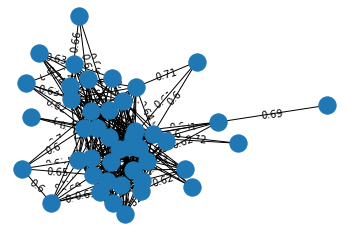

In [ ]:
#take 60% for in sample data
data=metadata['2014':'2016'].copy()

#get percentage return
pctreturn=data.pct_change().dropna()

#get correlation
correlation=pctreturn[components].corr()

graph,layout=create_graph(components,correlation,threshold)

In [ ]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 44
Number of edges: 364
Average degree:  16.5455


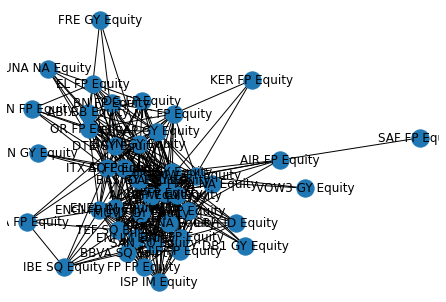

In [ ]:
#nx.draw_networkx_edge_labels(graph,pos=layout)
nx.draw(graph,with_labels = True,pos=layout)

In [ ]:
correlation.head(5)

,ABI BB Equity,AD NA Equity,ADS GY Equity,AI FP Equity,AIR FP Equity,ALV GY Equity,AMS SQ Equity,ASML NA Equity,BAS GY Equity,BAYN GY Equity,...,SAN FP Equity,SAN SQ Equity,SAP GY Equity,SIE GY Equity,SU FP Equity,TEF SQ Equity,UNA NA Equity,VIV FP Equity,VOW3 GY Equity,LIN GY Equity
ABI BB Equity,1.000000,0.510720,0.453014,0.612180,0.559958,0.564707,0.495618,0.485753,0.611151,0.651573,...,0.564916,0.529851,0.620283,0.570810,0.563709,0.577015,0.666240,0.507514,0.457739,0.451380
AD NA Equity,0.510720,1.000000,0.373961,0.504613,0.437366,0.451537,0.376464,0.412292,0.507325,0.494097,...,0.443682,0.364896,0.483462,0.493289,0.458216,0.425604,0.525220,0.382142,0.338165,0.436038
ADS GY Equity,0.453014,0.373961,1.000000,0.464527,0.433458,0.452944,0.427620,0.344865,0.482725,0.477322,...,0.409104,0.329061,0.477284,0.445297,0.417333,0.367616,0.423847,0.316181,0.317481,0.384192
AI FP Equity,0.612180,0.504613,0.464527,1.000000,0.566500,0.660720,0.453595,0.517676,0.754643,0.714626,...,0.608714,0.592916,0.633497,0.691888,0.696743,0.627694,0.599902,0.552555,0.478930,0.747141
AIR FP Equity,0.559958,0.437366,0.433458,0.566500,1.000000,0.572685,0.460502,0.468851,0.574354,0.577574,...,0.514985,0.552582,0.534929,0.604922,0.600325,0.565544,0.516687,0.497171,0.448196,0.454950


In [ ]:
def most_correlated(dataframe):
  corr_values = dataframe.abs().unstack()
  sorted_values = pd.DataFrame(corr_values.sort_values(kind='quicksort'),index = None)
  sorted_values = sorted_values[(sorted_values[0] > 0.6) & (sorted_values[0]<1)]
  return sorted_values.drop_duplicates()

In [ ]:
most_correlated(correlation)

,,0
IBE SQ Equity,ENI IM Equity,0.600120
ENI IM Equity,BAYN GY Equity,0.600160
INGA NA Equity,DTE GY Equity,0.600171
AIR FP Equity,SU FP Equity,0.600325
BMW GY Equity,KER FP Equity,0.600328
...,...,...
GLE FP Equity,INGA NA Equity,0.823195
FP FP Equity,ENI IM Equity,0.831881
DAI GY Equity,BMW GY Equity,0.879189
GLE FP Equity,BNP FP Equity,0.880887


In [ ]:
graph.nodes

NodeView(('ABI BB Equity', 'AI FP Equity', 'BAS GY Equity', 'BAYN GY Equity', 'BN FP Equity', 'DAI GY Equity', 'DG FP Equity', 'DTE GY Equity', 'EL FP Equity', 'ENEL IM Equity', 'ITX SQ Equity', 'OR FP Equity', 'SAP GY Equity', 'UNA NA Equity', 'ALV GY Equity', 'BMW GY Equity', 'BNP FP Equity', 'CS FP Equity', 'DPW GY Equity', 'ENGI FP Equity', 'ENI IM Equity', 'FP FP Equity', 'INGA NA Equity', 'MC FP Equity', 'MUV2 GY Equity', 'PHIA NA Equity', 'SAN FP Equity', 'SIE GY Equity', 'SU FP Equity', 'TEF SQ Equity', 'LIN GY Equity', 'AIR FP Equity', 'SAF FP Equity', 'BBVA SQ Equity', 'DB1 GY Equity', 'GLE FP Equity', 'ISP IM Equity', 'SAN SQ Equity', 'CRH ID Equity', 'FRE GY Equity', 'IBE SQ Equity', 'KER FP Equity', 'VOW3 GY Equity', 'ORA FP Equity'))

In [ ]:
graph.edges

EdgeView([('ABI BB Equity', 'AI FP Equity'), ('ABI BB Equity', 'BAS GY Equity'), ('ABI BB Equity', 'BAYN GY Equity'), ('ABI BB Equity', 'BN FP Equity'), ('ABI BB Equity', 'DAI GY Equity'), ('ABI BB Equity', 'DG FP Equity'), ('ABI BB Equity', 'DTE GY Equity'), ('ABI BB Equity', 'EL FP Equity'), ('ABI BB Equity', 'ENEL IM Equity'), ('ABI BB Equity', 'ITX SQ Equity'), ('ABI BB Equity', 'OR FP Equity'), ('ABI BB Equity', 'SAP GY Equity'), ('ABI BB Equity', 'UNA NA Equity'), ('AI FP Equity', 'ALV GY Equity'), ('AI FP Equity', 'BAS GY Equity'), ('AI FP Equity', 'BAYN GY Equity'), ('AI FP Equity', 'BMW GY Equity'), ('AI FP Equity', 'BN FP Equity'), ('AI FP Equity', 'BNP FP Equity'), ('AI FP Equity', 'CS FP Equity'), ('AI FP Equity', 'DAI GY Equity'), ('AI FP Equity', 'DPW GY Equity'), ('AI FP Equity', 'DTE GY Equity'), ('AI FP Equity', 'EL FP Equity'), ('AI FP Equity', 'ENEL IM Equity'), ('AI FP Equity', 'ENGI FP Equity'), ('AI FP Equity', 'ENI IM Equity'), ('AI FP Equity', 'FP FP Equity'), (

In [ ]:
pctreturn.head(5)

,ABI BB Equity,AD NA Equity,ADS GY Equity,AI FP Equity,AIR FP Equity,ALV GY Equity,AMS SQ Equity,ASML NA Equity,BAS GY Equity,BAYN GY Equity,...,SAN SQ Equity,SAP GY Equity,SIE GY Equity,SU FP Equity,TEF SQ Equity,UNA NA Equity,VIV FP Equity,VOW3 GY Equity,LIN GY Equity,SX5E
2014-01-03,0.011242,0.002681,-0.001969,0.005944,-0.002653,-0.001951,0.002793,-0.000148,0.002488,0.007496,...,0.006914,0.000649,0.005152,0.000803,0.006897,0.007093,0.003476,0.000000,0.006645,0.004739
2014-01-06,-0.017918,0.003437,-0.000548,-0.020188,-0.017199,0.003909,0.010813,-0.025092,-0.001959,-0.004466,...,0.011688,0.004699,-0.003116,0.004494,-0.000857,-0.007731,-0.009326,-0.008728,-0.006271,-0.001714
2014-01-07,0.020109,0.003425,-0.001097,-0.015577,0.008660,0.013240,-0.011669,-0.008024,0.027480,0.010460,...,0.037778,-0.007903,0.005041,-0.011024,0.019709,0.008830,0.002421,0.006289,-0.013949,0.013619
2014-01-08,0.004830,-0.003038,-0.005051,0.008371,-0.010016,-0.005380,0.007051,0.002747,-0.006623,-0.012817,...,0.007734,0.016908,-0.012739,-0.005331,0.005465,-0.013558,-0.006976,0.000750,0.005052,-0.000096
2014-01-09,0.002988,-0.010264,-0.021852,-0.005567,-0.011563,-0.011206,0.008631,0.010350,-0.016410,-0.012791,...,-0.007674,-0.012790,-0.006706,0.002274,0.003762,-0.015832,-0.000811,-0.003497,-0.014745,-0.006558


In [ ]:
data.shape

(510, 57)

&nbsp;
### Degeneracy Ordering / K-Core
&nbsp;

In [ ]:
#get independent vertex set
def degeneracy_ordering(graph,components):
    
    #degeneracy ordering
    degeneracy=dict(sorted(nx.core_number(graph).items(),
                           key=lambda x:x[1]))
        
    #create independent vertex set
    independence=[]
    for i in degeneracy:
        if not set(graph.neighbors(i)).intersection(set(independence)):
            independence.append(i)
        
    #add vertices not in graph
    leftout=[i for i in components if i not in graph.nodes]
    
    return independence,leftout

In [ ]:
 #degeneracy=dict(sorted(nx.core_number(graph).items(),key=lambda x:x[1]))
 #len(degeneracy)

In [ ]:
#find optimal threshold for correlation
def find_optimal_threshold(itr,data,components,correlation):
    
    optimal=[]
    for threshold_itr in itr:

        graph,_=create_graph(components,correlation,threshold_itr)        
        independence,leftout=degeneracy_ordering(graph,components)
        
        #compute sharpe ratio
        temp=data[leftout+independence].sum(axis=1).pct_change().dropna()
        optimal.append(temp.mean()/temp.std())
    
    #viz
    ax=plt.figure(figsize=(10,5)).add_subplot(111)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.bar(np.arange(0.5,0.7,0.01),optimal,
            width=0.008,color='#F9CDAD')
    plt.title('Optimal Correlation')
    plt.xlabel('Correlation')
    plt.ylabel('Sharpe Ratio')
    plt.show()

In [ ]:
#get independent vertex set
independence,leftout=degeneracy_ordering(graph,components)
data['degeneracy']=data[leftout+independence].sum(axis=1)

In [ ]:
independence, leftout

(['SAF FP Equity',
  'VOW3 GY Equity',
  'LIN GY Equity',
  'FRE GY Equity',
  'KER FP Equity',
  'DB1 GY Equity',
  'SAN FP Equity',
  'ORA FP Equity',
  'UNA NA Equity',
  'CRH ID Equity',
  'DG FP Equity',
  'FP FP Equity',
  'ISP IM Equity',
  'SAP GY Equity'],
 ['AD NA Equity',
  'ADS GY Equity',
  'AMS SQ Equity',
  'ASML NA Equity',
  'NOKIA FH Equity',
  'VIV FP Equity'])

In [ ]:
degeneracy_ordering_nodes = degeneracy_ordering(graph,components)
degeneracy_ordering_nodes

(['SAF FP Equity',
  'VOW3 GY Equity',
  'LIN GY Equity',
  'FRE GY Equity',
  'KER FP Equity',
  'DB1 GY Equity',
  'SAN FP Equity',
  'ORA FP Equity',
  'UNA NA Equity',
  'CRH ID Equity',
  'DG FP Equity',
  'FP FP Equity',
  'ISP IM Equity',
  'SAP GY Equity'],
 ['AD NA Equity',
  'ADS GY Equity',
  'AMS SQ Equity',
  'ASML NA Equity',
  'NOKIA FH Equity',
  'VIV FP Equity'])

In [ ]:
data[leftout], data[independence]

(            AD NA Equity  ADS GY Equity  AMS SQ Equity  ASML NA Equity  \
 2014-01-02       15.0326          91.40         30.435           67.76   
 2014-01-03       15.0729          91.22         30.520           67.75   
 2014-01-06       15.1247          91.17         30.850           66.05   
 2014-01-07       15.1765          91.07         30.490           65.52   
 2014-01-08       15.1304          90.61         30.705           65.70   
 ...                  ...            ...            ...             ...   
 2016-12-23       19.6500         144.50         43.180          105.85   
 2016-12-27       19.6800         145.55         43.475          106.50   
 2016-12-28       19.7000         147.25         43.290          107.00   
 2016-12-29       19.7050         147.95         43.475          106.10   
 2016-12-30       20.0300         150.15         43.170          106.65   
 
             NOKIA FH Equity  VIV FP Equity  
 2014-01-02            5.860         18.700  
 2014-

In [ ]:
data.shape

(510, 57)

In [ ]:
data.head(5)

,ABI BB Equity,AD NA Equity,ADS GY Equity,AI FP Equity,AIR FP Equity,ALV GY Equity,AMS SQ Equity,ASML NA Equity,BAS GY Equity,BAYN GY Equity,...,SAP GY Equity,SIE GY Equity,SU FP Equity,TEF SQ Equity,UNA NA Equity,VIV FP Equity,VOW3 GY Equity,LIN GY Equity,SX5E,degeneracy
2014-01-02,75.61,15.0326,91.40,73.8742,56.55,128.15,30.435,67.76,76.38,98.459,...,61.67,98.99,62.26,11.4686,28.900,18.700,200.50,150.500000,3059.93,1156.135600
2014-01-03,76.46,15.0729,91.22,74.3133,56.40,127.90,30.520,67.75,76.57,99.197,...,61.71,99.50,62.31,11.5477,29.105,18.765,200.50,151.500000,3074.43,1160.053900
2014-01-06,75.09,15.1247,91.17,72.8131,55.43,128.40,30.850,66.05,76.42,98.754,...,62.00,99.19,62.59,11.5378,28.880,18.590,198.75,150.550003,3069.16,1155.071703
2014-01-07,76.60,15.1765,91.07,71.6789,55.91,130.10,30.490,65.52,78.52,99.787,...,61.51,99.69,61.90,11.7652,29.135,18.635,200.00,148.449997,3110.96,1153.278497
2014-01-08,76.97,15.1304,90.61,72.2789,55.35,129.40,30.705,65.70,78.00,98.508,...,62.55,98.42,61.57,11.8295,28.740,18.505,200.15,149.199997,3110.66,1152.874397


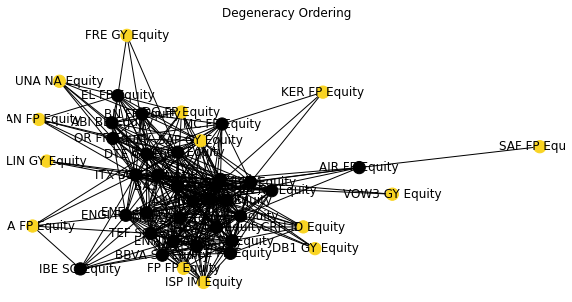

In [ ]:
#highlight selected vertices
color=[]
for i in graph.nodes:
    if i not in independence:
        color.append('#000000')
    else:
        color.append('#F9D423')

#viz graph
ax=plt.figure(figsize=(10,5)).add_subplot(111)
nx.draw(graph,with_labels =True,node_color=color,pos=layout,node_size=150)
plt.title('Degeneracy Ordering')
plt.show()

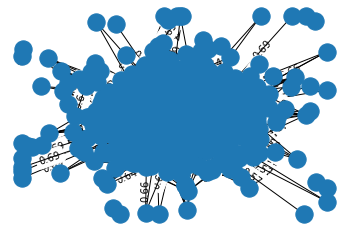

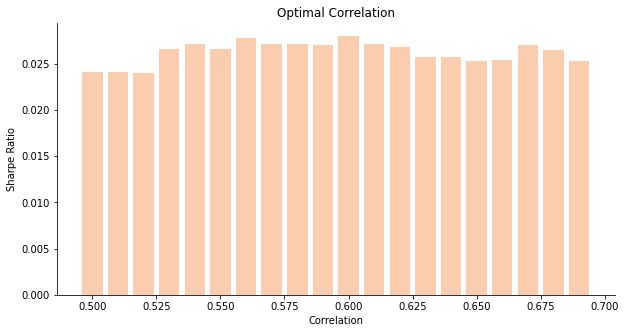

In [ ]:
find_optimal_threshold(np.arange(0.5,0.7,0.01),
                       data,components,correlation)

&nbsp;
### Clique Centrality
&nbsp;

In [ ]:
#use cross maximal clique centrality to construct the portfolio
def clique_centrality(graph,centrality):
    
    #compute cross maximal clique centrality
    cliques=list(nx.find_cliques(graph))

    D={}
    for ii in set([j for i in cliques for j in i]):
        D[ii]=[j for i in cliques for j in i].count(ii)

    #select vertices with centrality larger than the threshold
    clique_selected=[i[0] for i in D.items() if i[1]>centrality]
    
    return clique_selected

In [ ]:
#find optimal threshold for correlation and centrality
def find_optimal_heat(itr1,itr2,data,components,correlation):
    
    #create dataframe for heatmap
    heat=pd.DataFrame(index=itr1)
    for i in itr2:
        heat[round(i,2)]=np.nan

    for threshold_itr in itr2:
        for centrality_itr in itr1:
            
            graph,_=create_graph(components,correlation,threshold_itr)        
            cliques=list(nx.find_cliques(graph))
            
            #efficient execution when no clique is found
            if cliques:
                
                #compute cross maximal clique centrality
                clique_selected=clique_centrality(graph,centrality_itr)
                
                #compute sharpe ratio
                temp=data[clique_selected].sum(axis=1).pct_change().dropna()
                heat.at[round(centrality_itr,2),
                        round(threshold_itr,2)]=temp.mean()/temp.std()
            else:
                pass
    
    #viz   
    heatmap(heat)

    
#create heatmap seaborn style
def heatmap(df,fig_size=(10,5),fontsize=0.8):
        
    fig=plt.figure(figsize=fig_size)
    ax=fig.add_subplot(111)

    sns.set(font_scale=fontsize)
    
    #viz
    sns.heatmap(df,cmap=plt.cm.magma_r,
                robust=True,
                xticklabels=df.columns,
                yticklabels=df.index,
                ax=ax)
    
    #color bar title
    ax.collections[0].colorbar.set_label('Sharpe Ratio\n \n',rotation=270)
    
    plt.title('Optimal Correlation & Centrality')
    plt.xlabel('Correlation')
    plt.ylabel('Centrality')
    sns.set()
    
    plt.show()
    plt.style.use('default')

In [ ]:
#use cross maximal clique centrality to construct the portfolio
clique_selected=clique_centrality(graph,centrality)
data['clique']=data[clique_selected].sum(axis=1)

In [ ]:
data.shape

(510, 57)

In [ ]:
data.head(5)

,ABI BB Equity,AD NA Equity,ADS GY Equity,AI FP Equity,AIR FP Equity,ALV GY Equity,AMS SQ Equity,ASML NA Equity,BAS GY Equity,BAYN GY Equity,...,SIE GY Equity,SU FP Equity,TEF SQ Equity,UNA NA Equity,VIV FP Equity,VOW3 GY Equity,LIN GY Equity,SX5E,degeneracy,clique
2014-01-02,75.61,15.0326,91.40,73.8742,56.55,128.15,30.435,67.76,76.38,98.459,...,98.99,62.26,11.4686,28.900,18.700,200.50,150.500000,3059.93,1156.135600,935.5711
2014-01-03,76.46,15.0729,91.22,74.3133,56.40,127.90,30.520,67.75,76.57,99.197,...,99.50,62.31,11.5477,29.105,18.765,200.50,151.500000,3074.43,1160.053900,938.3916
2014-01-06,75.09,15.1247,91.17,72.8131,55.43,128.40,30.850,66.05,76.42,98.754,...,99.19,62.59,11.5378,28.880,18.590,198.75,150.550003,3069.16,1155.071703,935.7542
2014-01-07,76.60,15.1765,91.07,71.6789,55.91,130.10,30.490,65.52,78.52,99.787,...,99.69,61.90,11.7652,29.135,18.635,200.00,148.449997,3110.96,1153.278497,946.4534
2014-01-08,76.97,15.1304,90.61,72.2789,55.35,129.40,30.705,65.70,78.00,98.508,...,98.42,61.57,11.8295,28.740,18.505,200.15,149.199997,3110.66,1152.874397,946.0059


In [ ]:
cliques=list(nx.find_cliques(graph))
list(cliques)

[['MC FP Equity', 'KER FP Equity'],
 ['ALV GY Equity', 'MUV2 GY Equity'],
 ['ALV GY Equity', 'BAS GY Equity'],
 ['ENI IM Equity', 'FP FP Equity'],
 ['TEF SQ Equity', 'SAN SQ Equity'],
 ['TEF SQ Equity', 'ORA FP Equity'],
 ['VOW3 GY Equity', 'DAI GY Equity', 'BMW GY Equity'],
 ['ORA FP Equity', 'DTE GY Equity'],
 ['SU FP Equity', 'SIE GY Equity'],
 ['BNP FP Equity',
  'INGA NA Equity',
  'GLE FP Equity',
  'SAN SQ Equity',
  'BBVA SQ Equity'],
 ['BNP FP Equity', 'INGA NA Equity', 'GLE FP Equity', 'CS FP Equity'],
 ['BNP FP Equity', 'INGA NA Equity', 'ISP IM Equity', 'SAN SQ Equity'],
 ['DAI GY Equity', 'BAS GY Equity'],
 ['SAF FP Equity', 'AIR FP Equity'],
 ['ENEL IM Equity', 'IBE SQ Equity'],
 ['SIE GY Equity', 'BAS GY Equity'],
 ['AI FP Equity', 'BAS GY Equity']]

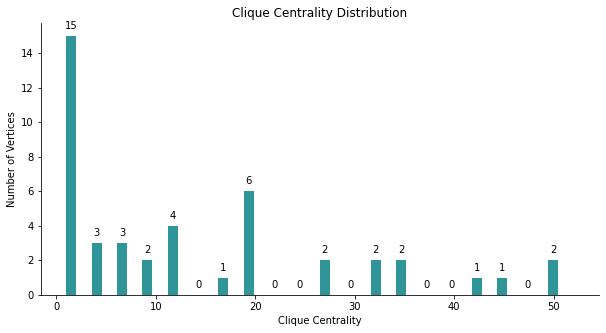

In [ ]:
#viz clique centrality distribution
cliques=list(nx.find_cliques(graph))
dic={}
for ii in set([j for i in cliques for j in i]):
    dic[ii]=[j for i in cliques for j in i].count(ii)
        
#viz
ax=plt.figure(figsize=(10,5)).add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.hist(dic.values(),width=1,bins=20,color='#2F9599')
n, bins, patches = plt.hist(dic.values(),width=1,bins=20,color='#2F9599')

plt.title('Clique Centrality Distribution')
plt.xlabel('Clique Centrality')
plt.ylabel('Number of Vertices')

# add labels to bars
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    label = int(y)
    ax.annotate(label, (x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.show()

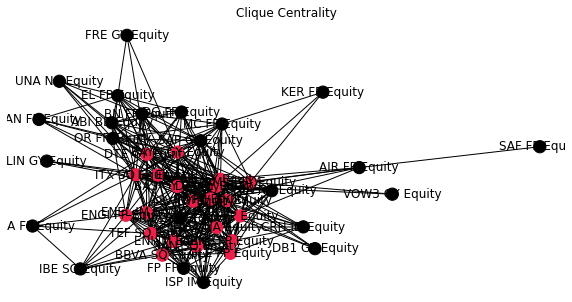

In [ ]:
#highlight selected vertices
color=[]
for i in graph.nodes:
    if i not in clique_selected:
        color.append('#000000')
    else:
        color.append('#EC2049')

#viz graph
ax=plt.figure(figsize=(10,5)).add_subplot(111)
nx.draw(graph,with_labels =True,node_color=color,pos=layout,node_size=150)
plt.title('Clique Centrality')
plt.show()

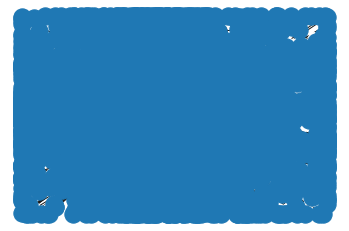

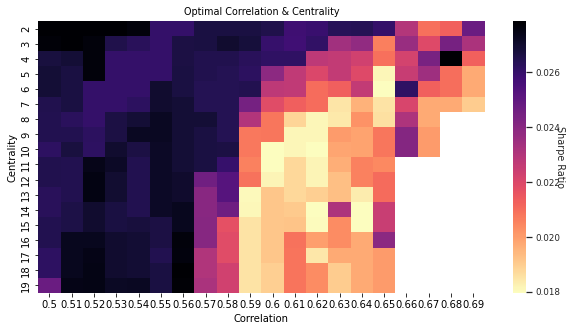

In [ ]:
#viz optimal thresholds of correlation and centrality
find_optimal_heat(range(2,20),np.arange(0.5,0.7,0.01),
                  data,components,correlation)

In [ ]:
covariance=cvxopt.matrix(np.cov(np.array(pctreturn[components].T)))

In [ ]:
components, list(covariance)

(['ABI BB Equity',
  'AD NA Equity',
  'ADS GY Equity',
  'AI FP Equity',
  'AIR FP Equity',
  'ALV GY Equity',
  'AMS SQ Equity',
  'ASML NA Equity',
  'BAS GY Equity',
  'BAYN GY Equity',
  'BBVA SQ Equity',
  'BMW GY Equity',
  'BN FP Equity',
  'BNP FP Equity',
  'CRH ID Equity',
  'CS FP Equity',
  'DAI GY Equity',
  'DB1 GY Equity',
  'DG FP Equity',
  'DPW GY Equity',
  'DTE GY Equity',
  'EL FP Equity',
  'ENEL IM Equity',
  'ENGI FP Equity',
  'ENI IM Equity',
  'FP FP Equity',
  'FRE GY Equity',
  'GLE FP Equity',
  'IBE SQ Equity',
  'INGA NA Equity',
  'ISP IM Equity',
  'ITX SQ Equity',
  'KER FP Equity',
  'MC FP Equity',
  'MUV2 GY Equity',
  'NOKIA FH Equity',
  'ORA FP Equity',
  'OR FP Equity',
  'PHIA NA Equity',
  'SAF FP Equity',
  'SAN FP Equity',
  'SAN SQ Equity',
  'SAP GY Equity',
  'SIE GY Equity',
  'SU FP Equity',
  'TEF SQ Equity',
  'UNA NA Equity',
  'VIV FP Equity',
  'VOW3 GY Equity',
  'LIN GY Equity'],
 [0.0002023575127681149,
  0.0001009894259187029

In [ ]:
assets = len(components)
assets

50

&nbsp;
### Markowitz Optimization
&nbsp;

In [ ]:
#find global maximum
def markowitz_optimization(pctreturn,components):

    #hide progress output
    cvxopt.solvers.options['show_progress']=False

    #create covariance matrix
    covariance=cvxopt.matrix(np.cov(np.array(pctreturn[components].T)))

    #number of assets
    assets=len(components)

    #realized return
    mean_return=cvxopt.matrix(pctreturn[components].mean(axis=0))

    #all weights should be larger than 0
    inequality_coeff=cvxopt.matrix(0.0,(assets,assets))
    inequality_coeff[::assets+1]=-1.0
    inequality_value=cvxopt.matrix(0.0,(assets,1))

    #sum of all weights equal to one
    equality_coeff=cvxopt.matrix(1.0,(1,assets))
    equality_value=cvxopt.matrix(1.0)

    #risk aversion parameter
    miu=1

    #maximize sharpe ratio
    max_sharpe=cvxopt.solvers.qp(P=cvxopt.matrix(miu*covariance),
                                 q=-mean_return,
                                 G=inequality_coeff,
                                 h=inequality_value,
                                 A=equality_coeff,
                                 b=equality_value)['x']

    #minimize standard deviation
    min_variance=cvxopt.solvers.qp(P=cvxopt.matrix(covariance), 
                           q=cvxopt.matrix(0.0,(assets,1)),
                           G=inequality_coeff, 
                           h=inequality_value, 
                           A=equality_coeff, 
                           b=equality_value)['x']

    #maximize realized return
    max_return=cvxopt.solvers.qp(P=cvxopt.matrix(0.0,(assets,assets)),
                                 q=-mean_return,
                                 G=inequality_coeff,
                                 h=inequality_value,
                                 A=equality_coeff,
                                 b=equality_value)['x']
    
    return (max_sharpe,min_variance,max_return)

In [ ]:
#markowitz portfolio optimization
max_sharpe,min_variance,max_return=markowitz_optimization(pctreturn,components)
data['sharpe']=np.dot(np.mat(data[components]),np.mat(max_sharpe)).reshape(-1,).tolist()[0]
data['variance']=np.dot(np.mat(data[components]),np.mat(min_variance)).reshape(-1,).tolist()[0]
data['return']=np.dot(np.mat(data[components]),np.mat(max_return)).reshape(-1,).tolist()[0]

#create equal weight index
data['equal']=data[components].sum(axis=1)

In [ ]:
#data[['ABI BB Equity']].sum(axis=0)

ABI BB Equity    46455.74
dtype: float64

In [ ]:
data.shape

(510, 57)

In [ ]:
data.head(5)

,ABI BB Equity,AD NA Equity,ADS GY Equity,AI FP Equity,AIR FP Equity,ALV GY Equity,AMS SQ Equity,ASML NA Equity,BAS GY Equity,BAYN GY Equity,...,VIV FP Equity,VOW3 GY Equity,LIN GY Equity,SX5E,degeneracy,clique,sharpe,variance,return,equal
2017-01-02,101.10,20.075,151.30,87.1074,62.82,157.30,43.430,107.05,88.70,98.606,...,18.095,137.75,158.500000,3308.67,1426.570000,1054.5133,73.783282,65.291763,74.769545,3383.735300
2017-01-03,100.20,19.960,149.25,87.3140,63.50,159.55,43.505,106.60,87.70,99.148,...,18.110,140.45,157.699997,3315.02,1423.478997,1059.9630,72.905339,65.068100,73.879558,3378.474997
2017-01-04,100.45,19.855,146.40,87.2314,63.40,160.40,43.505,105.15,88.15,100.427,...,18.210,138.75,155.850006,3317.52,1412.280006,1062.0600,73.573305,65.038921,74.569522,3367.552006
2017-01-05,101.05,19.655,144.30,87.2727,64.60,160.70,43.875,105.40,87.79,101.017,...,18.240,139.10,154.699997,3316.47,1407.228997,1060.6700,73.564418,64.464198,74.559515,3360.102997
2017-01-06,100.50,19.615,144.80,87.6446,65.14,161.10,43.620,105.40,87.52,100.771,...,18.330,139.00,153.850006,3321.17,1408.775006,1063.7015,73.874495,64.410371,74.879510,3367.289506


In [ ]:
data['equal']

2017-01-02    3383.735300
2017-01-03    3378.474997
2017-01-04    3367.552006
2017-01-05    3360.102997
2017-01-06    3367.289506
                 ...     
2018-12-21    3591.391397
2018-12-24    3555.592597
2018-12-27    3514.504200
2018-12-28    3579.968703
2018-12-31    3611.796203
Name: equal, Length: 510, dtype: float64

In [ ]:
#(data['sharpe']/data['sharpe'].iloc[0])

2017-01-02    1.000000
2017-01-03    0.988101
2017-01-04    0.997154
2017-01-05    0.997034
2017-01-06    1.001236
                ...   
2018-12-21    0.574550
2018-12-24    0.574600
2018-12-27    0.558621
2018-12-28    0.568274
2018-12-31    0.568297
Name: sharpe, Length: 510, dtype: float64

In [ ]:
(data['SX5E']/data['SX5E'].iloc[0])

2017-01-02    1.000000
2017-01-03    1.001919
2017-01-04    1.002675
2017-01-05    1.002357
2017-01-06    1.003778
                ...   
2018-12-21    0.906893
2018-12-24    0.898784
2018-12-27    0.887777
2018-12-28    0.902638
2018-12-31    0.907138
Name: SX5E, Length: 510, dtype: float64

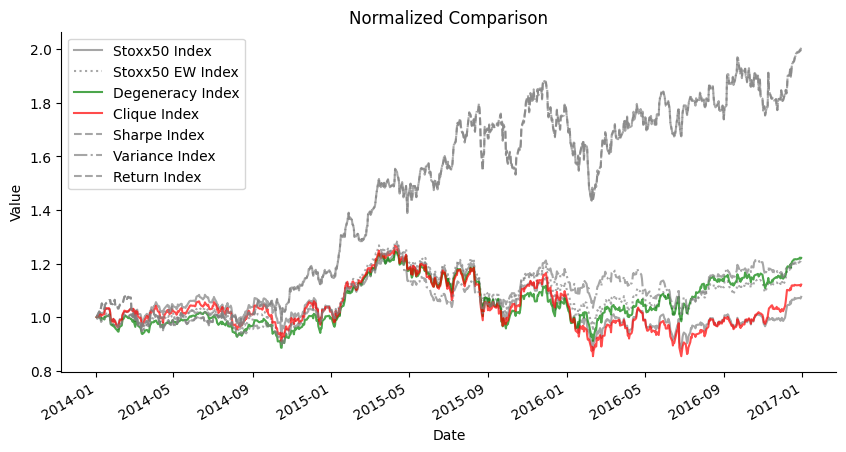

In [ ]:
#normalized comparison
ax=plt.figure(figsize=(10,5)).add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

(data['SX5E']/data['SX5E'].iloc[0]).plot(label='Stoxx50 Index',alpha=0.7,color='grey')
(data['equal']/data['equal'].iloc[0]).plot(label='Stoxx50 EW Index',alpha=0.7,color='grey',linestyle=':')
(data['degeneracy']/data['degeneracy'].iloc[0]).plot(label='Degeneracy Index',alpha=0.7,color='green')
(data['clique']/data['clique'].iloc[0]).plot(label='Clique Index',alpha=0.7,color='red')
(data['sharpe']/data['sharpe'].iloc[0]).plot(label='Sharpe Index',alpha=0.7,color='grey',linestyle='--')
(data['variance']/data['variance'].iloc[0]).plot(label='Variance Index',alpha=0.7,color='grey',linestyle='-.')
(data['return']/data['return'].iloc[0]).plot(label='Return Index',alpha=0.7,color='grey',linestyle='--')

plt.legend(loc=0)
plt.title('Normalized Comparison')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

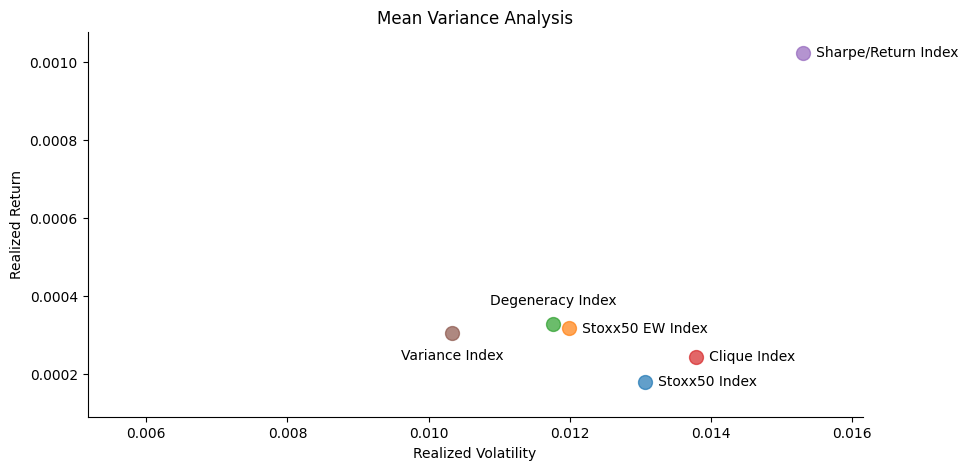

In [ ]:
#mean variance analysis
comparison={}

for i in ['SX5E','equal','degeneracy','clique','sharpe','variance','return']:
    comparison[i]=(data[i].pct_change().dropna().std(), 
          data[i].pct_change().dropna().mean())
    
#viz
ax=plt.figure(figsize=(10,5)).add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.scatter(comparison['SX5E'][0],comparison['SX5E'][1],
            s=100,alpha=0.7)
plt.annotate(text='   Stoxx50 Index',xy=(comparison['SX5E'][0],comparison['SX5E'][1]),
             ha='left',va='center')
plt.scatter(comparison['equal'][0],comparison['equal'][1],
            s=100,alpha=0.7)
plt.annotate(text='   Stoxx50 EW Index',xy=(comparison['equal'][0],comparison['equal'][1]),
             ha='left',va='center')
plt.scatter(comparison['degeneracy'][0],comparison['degeneracy'][1],
            s=100,alpha=0.7)
plt.annotate(text='Degeneracy Index\n',xy=(comparison['degeneracy'][0],comparison['degeneracy'][1]),
             ha='center',va='bottom')
plt.scatter(comparison['clique'][0],comparison['clique'][1],
            s=100,alpha=0.7)
plt.annotate( text='   Clique Index',xy=(comparison['clique'][0],comparison['clique'][1]),
            ha='left',va='center')
plt.scatter(comparison['sharpe'][0],comparison['sharpe'][1],
            s=100,alpha=0.7)
plt.annotate(text='   Sharpe/Return Index',xy=(comparison['sharpe'][0],comparison['sharpe'][1]),
             ha='left',va='center')
plt.scatter(comparison['variance'][0],comparison['variance'][1],
            s=100,alpha=0.7)
plt.annotate(text='\nVariance Index',xy=(comparison['variance'][0],comparison['variance'][1]),
             ha='center',va='top')

plt.xlim(min([i[0] for i in comparison.values()])*0.5, 
         max([i[0] for i in comparison.values()])*1.05)
plt.ylim(min([i[1] for i in comparison.values()])*0.5, 
         max([i[1] for i in comparison.values()])*1.05)
plt.title('Mean Variance Analysis')
plt.xlabel('Realized Volatility')
plt.ylabel('Realized Return')
plt.show()

&nbsp;
### Out of Sample
&nbsp;

(510, 51)

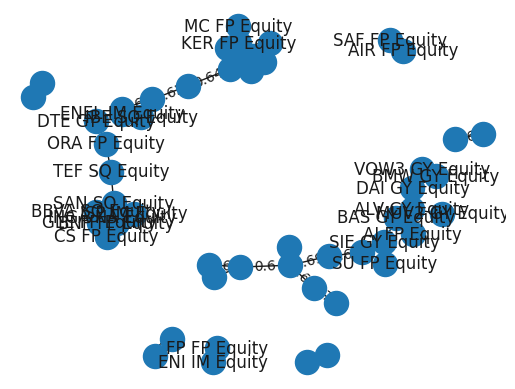

In [ ]:
#take 30% for outta sample data
data=metadata['2017':].copy()

#get percentage return
pctreturn=data.pct_change().dropna()

#get correlation
correlation=pctreturn[components].corr()

#pre-processing
graph,layout=create_graph(components,correlation,threshold)

nx.draw(graph,with_labels = True)


In [ ]:
#nx.draw(graph,with_labels = True)

In [ ]:
#generate indices
data['degeneracy']=data[leftout+independence].sum(axis=1)
data['clique']=data[clique_selected].sum(axis=1)
data['sharpe']=np.dot(np.mat(data[components]),np.mat(max_sharpe)).reshape(-1,).tolist()[0]
data['variance']=np.dot(np.mat(data[components]),np.mat(min_variance)).reshape(-1,).tolist()[0]
data['return']=np.dot(np.mat(data[components]),np.mat(max_return)).reshape(-1,).tolist()[0]
data['equal']=data[components].sum(axis=1)

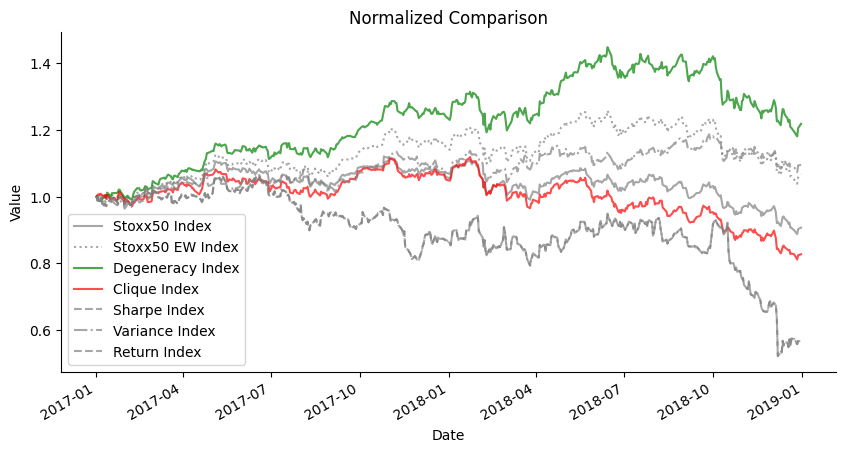

In [ ]:
#normalized comparison
ax=plt.figure(figsize=(10,5)).add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

(data['SX5E']/data['SX5E'].iloc[0]).plot(label='Stoxx50 Index',alpha=0.7,color='grey')
(data['equal']/data['equal'].iloc[0]).plot(label='Stoxx50 EW Index',alpha=0.7,color='grey',linestyle=':')
(data['degeneracy']/data['degeneracy'].iloc[0]).plot(label='Degeneracy Index',alpha=0.7,color='green')
(data['clique']/data['clique'].iloc[0]).plot(label='Clique Index',alpha=0.7,color='red')
(data['sharpe']/data['sharpe'].iloc[0]).plot(label='Sharpe Index',alpha=0.7,color='grey',linestyle='--')
(data['variance']/data['variance'].iloc[0]).plot(label='Variance Index',alpha=0.7,color='grey',linestyle='-.')
(data['return']/data['return'].iloc[0]).plot(label='Return Index',alpha=0.7,color='grey',linestyle='--')

plt.legend(loc=0)
plt.title('Normalized Comparison')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

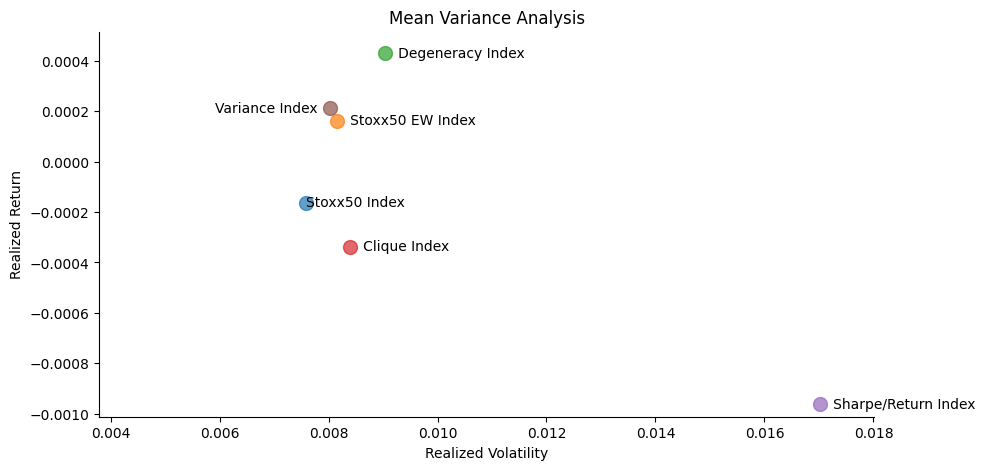

In [ ]:
#mean variance analysis
comparison={}

for i in ['SX5E','equal','degeneracy','clique','sharpe','variance','return']:
    comparison[i]=(data[i].pct_change().dropna().std(), 
          data[i].pct_change().dropna().mean())
    
#viz
ax=plt.figure(figsize=(10,5)).add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.scatter(comparison['SX5E'][0],comparison['SX5E'][1],s=100,alpha=0.7)
plt.annotate(text='Stoxx50 Index',xy=(comparison['SX5E'][0],comparison['SX5E'][1]),ha='left',va='center')
plt.scatter(comparison['equal'][0],comparison['equal'][1],s=100,alpha=0.7)
plt.annotate(text='   Stoxx50 EW Index',xy=(comparison['equal'][0],comparison['equal'][1]),ha='left',va='center')
plt.scatter(comparison['degeneracy'][0],comparison['degeneracy'][1],s=100,alpha=0.7)
plt.annotate(text='   Degeneracy Index',xy=(comparison['degeneracy'][0],comparison['degeneracy'][1]),ha='left',va='center')
plt.scatter(comparison['clique'][0],comparison['clique'][1],s=100,alpha=0.7)
plt.annotate(text='   Clique Index',xy=(comparison['clique'][0],comparison['clique'][1]),ha='left',va='center')
plt.scatter(comparison['sharpe'][0],comparison['sharpe'][1],s=100,alpha=0.7)
plt.annotate(text='   Sharpe/Return Index',xy=(comparison['sharpe'][0],comparison['sharpe'][1]),ha='left',va='center')
plt.scatter(comparison['variance'][0],comparison['variance'][1],s=100,alpha=0.7)
plt.annotate(text='Variance Index   ',xy=(comparison['variance'][0],comparison['variance'][1]),ha='right',va='center')

plt.xlim(min([i[0] for i in comparison.values()])*0.5, 
         max([i[0] for i in comparison.values()])*1.05)

plt.ylim(min([i[1] for i in comparison.values()])*1.05, 
         max([i[1] for i in comparison.values()])*1.2)

plt.title('Mean Variance Analysis')
plt.xlabel('Realized Volatility')
plt.ylabel('Realized Return')
plt.show()